# PyTorch DataLoaders


As an example dataset the [old kaggle competition](https://www.kaggle.com/c/dogs-vs-cats) is used. It is a classification problem with two target classes: cats vs dogs.

Please, group the images of different classes in different folders. You can use the following bash script:
```
unzip train.zip

cd train

mkdir cats
mkdir dogs

find . -name "cat*.jpg" -exec mv {} ./cats \;
find . -name "dog*.jpg" -exec mv {} ./dogs \;

```

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms


__Dataset__


In [3]:
data_dir = '../data'

# ignore it for now
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir,
                               transform=transform)
# ignore it for now
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=1,
                                         shuffle=True)

To display the image properly we need to cast some numpy magic:

In [133]:
def get_image(dataloader):
    image = np.rollaxis(next(iter(dataloader))[0][0].detach().numpy(), 0, 3)
    return image

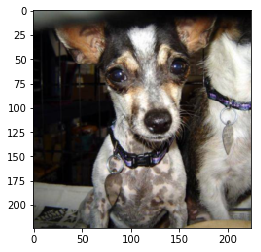

In [134]:
plt.imshow(get_image(dataloader), interpolation='nearest')

__Transformations__


In [136]:
expample_transforms = transforms.Compose([transforms.RandomRotation(90),
                                          transforms.RandomResizedCrop(224),
                                          transforms.ToTensor()]) 

transformed_data = datasets.ImageFolder(data_dir, transform=expample_transforms)

# ignore it for now
transformed_dataloader = torch.utils.data.DataLoader(transformed_data,
                                                     batch_size=1,
                                                     shuffle=True)

Let's see what we have got

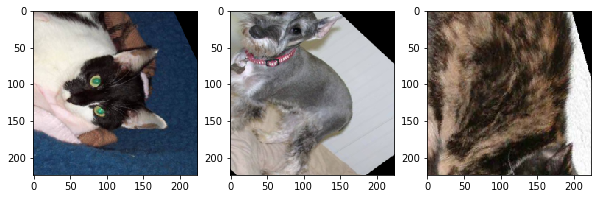

In [137]:
fig, ax = plt.subplots(1, 3, figsize=(10, 30))
for i in range(3):
    ax[i].imshow(get_image(transformed_dataloader), interpolation='nearest')

__Data Loaders__


In [138]:
expample_transforms = transforms.Compose([transforms.RandomRotation(15),
                                          transforms.RandomResizedCrop(224),
                                          transforms.ToTensor()]) 

transformed_data = datasets.ImageFolder(data_dir, transform=expample_transforms)

final_dataloader = torch.utils.data.DataLoader(transformed_data,
                                               batch_size=32,
                                               shuffle=True)

In [139]:
batch_example, labels_example = next(iter(final_dataloader))

We have got bath of size 32.

In [114]:
batch_example.shape

torch.Size([32, 3, 224, 224])

Label values are based on the path in the provided image folder (2 folders with images: Cats and Dogs).

In [140]:
labels_example

tensor([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 0])

__Data augmentation__


At the end of this notebook, please define your transformation using the `Lambda` class and apply it to the images.

In [168]:
def example_tranformation_function(torch_tensor):
    """
        Simply inverse the colormap of the image (actually, it's a tensor)
    """
    return 1. - torch_tensor

example_transform = transforms.Lambda(example_tranformation_function)
transforms = transforms.Compose([transforms.RandomRotation(15),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          example_transform
                                         ]) 

transformed_data = datasets.ImageFolder(data_dir, transform=transforms)

final_dataloader = torch.utils.data.DataLoader(transformed_data,
                                               batch_size=1,
                                               shuffle=True)

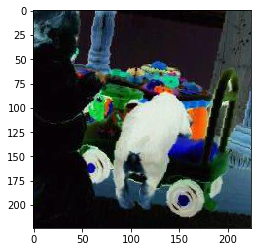

In [170]:
plt.imshow(get_image(final_dataloader))

In [171]:
def my_transformation_function(data):
    raise NotImplementedError()

    
# Add your transformation to the pipeline and check the final image.